In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# print(train_images[0])
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images/255. #값을 0부터1까지로
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu') (flat)
drop4 = Dropout(rate=0.2)(dense4)  # 일반화 20비율로 스킵하여 학습을 하지 않음
outputs = Dense(10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          3692

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER='/content/drive/MyDrive/models'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy',verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=6)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])  #callbacks 내가 함수를 호출하는 것이 아니라 시스템이 함수를 소출시키는 것

Epoch 1/100
297/300 [============================>.] - ETA: 0s - loss: 0.3530 - accuracy: 0.8902
Epoch 1: val_accuracy improved from -inf to 0.97494, saving model to /content/drive/MyDrive/modelsmnist-1-0.07953-0.97494.hdf5
300/300 [==============================] - 5s 16ms/step - loss: 0.3509 - accuracy: 0.8909 - val_loss: 0.0795 - val_accuracy: 0.9749
Epoch 2/100
299/300 [============================>.] - ETA: 0s - loss: 0.0910 - accuracy: 0.9725
Epoch 2: val_accuracy improved from 0.97494 to 0.98553, saving model to /content/drive/MyDrive/modelsmnist-2-0.04650-0.98553.hdf5
300/300 [==============================] - 4s 15ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 3/100
299/300 [============================>.] - ETA: 0s - loss: 0.0623 - accuracy: 0.9812
Epoch 3: val_accuracy improved from 0.98553 to 0.98835, saving model to /content/drive/MyDrive/modelsmnist-3-0.03517-0.98835.hdf5
300/300 [==============================] - 4s 14ms/step - 

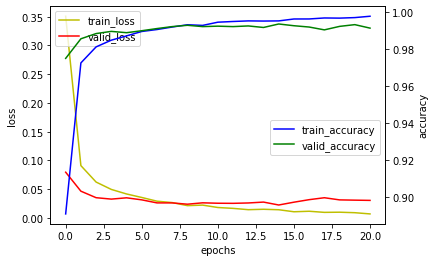

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
saved_path = '/content/drive/MyDrive/modelsmnist-9-0.02385-0.99282.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9887
Loss, Accuracy [0.03024616278707981, 0.9886666536331177]


In [ ]:
!ls -la '/content/drive/MyDrive/models/' #폴더 검색

total 391
-rw------- 1 root root 400264 Mar  3 01:50 modelsmnist-7-0.02742-0.99247.hdf5


In [ ]:
!rm '/content/drive/MyDrive/models/ *' #폴더에 내용 삭제하는거

rm: cannot remove '/content/drive/MyDrive/models/ *': No such file or directory


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel,self).__init__()
        self.conv1 = Conv2D(32,(3,3), activation='relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(64,(3,3),activation='relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(64,(3,3),activation='relu')
        self.flat = Flatten()
        self.dense4 = Dense(64,activation='relu')
        self.drop = Dropout(0.2)
        self.outputs = Dense(10,activation='softmax')
      
    def call(self, inputs, training= False): #포워드 함수
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.flat(net)
        net = self.dense4(net)
        net = self.drop(net)
        net = self.outputs(net)

        return net

model = MNISTModel()
inputs = Input(shape=(28,28,1))
model(inputs)

model.summary()
      

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           multiple                  36928     
                                                                 
 flatten_2 (Flatten)         multiple                  

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER='/content/drive/MyDrive/models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy', verbose=1,save_weights_only = True, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=6)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])  #callbacks 내가 함수를 호출하는 것이 아니라 시스템이 함수를 소출시키는 것

Epoch 1/100
299/300 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8918
Epoch 1: val_accuracy improved from -inf to 0.97800, saving model to /content/drive/MyDrive/models/mnist-1-0.07161-0.97800.hdf5
300/300 [==============================] - 5s 15ms/step - loss: 0.3499 - accuracy: 0.8921 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 2/100
300/300 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9733
Epoch 2: val_accuracy improved from 0.97800 to 0.98518, saving model to /content/drive/MyDrive/models/mnist-2-0.04807-0.98518.hdf5
300/300 [==============================] - 4s 14ms/step - loss: 0.0885 - accuracy: 0.9733 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 3/100
296/300 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9823
Epoch 3: val_accuracy improved from 0.98518 to 0.98706, saving model to /content/drive/MyDrive/models/mnist-3-0.04008-0.98706.hdf5
300/300 [==============================] - 4s 13ms/step

In [ ]:
saved_path = '/content/drive/MyDrive/models/mnist-9-0.02284-0.99282.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9940
Loss, Accuracy [0.025373738259077072, 0.9940000176429749]


In [ ]:
output = model(test_images)
output.shape

TensorShape([1500, 10])

In [ ]:
output[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.09980754e-10, 4.31749742e-13, 1.01987481e-11, 1.69811457e-10,
       1.86457385e-07, 7.30937033e-10, 3.97856525e-13, 1.91639265e-06,
       1.29163380e-09, 9.99997854e-01], dtype=float32)>

In [ ]:
import numpy as np
np.argmax(output[0])

9

In [ ]:
test_labels[0]

9